In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from pyspark import SparkConf, SparkContext
conf = SparkConf().setMaster('local').setAppName('Libro')
sc = SparkContext(conf = conf)

In [4]:
df = pd.read_excel(r"C:\Users\oswal\OneDrive\Documentos\Lic. Ciencia de Datos\4° Semestre\Bases de Datos II\Violencia de genero.xlsx")

In [5]:
print(df.shape)
df.head()

(667, 13)


,Timestamp,Género,Nivel máximo de estudios,Alcaldía,Edad,¿Has escuchado alguna vez sobre la existencia de la violencia de género?,¿Consideras un problema la violencia de género?,¿Alguna ves has presenciado violencia de género?,¿Donde has presenciado violencia de género?,¿Cuáles crees que podrían ser formas de Violencia de género?,¿Por qué motivo crees que se dé la violencia de género?,¿Dentro de tu núcleo familiar has visto alguna vez violencia de género?,¿Qué te provoca esta encuesta?
0,2021-03-26 19:19:17.810,Mujer,Maestría,Azcapotzalco,32,Sí,Sí,Sí,"En la familia, En el trabajo, En la escuela, E...","Golpear, empujar, Agredir psicológicamente","Falta de educacion, Negligencia por parte de l...",Sí,Me importa
1,2021-03-26 19:24:59.776,Mujer,Universidad,Gustavo A. Madero,25,Sí,Sí,Sí,"En la familia, En la escuela",Todas las anteriores,"Falta de educacion, Religión, Costumbre familiar",Sí,Indiferencia
2,2021-03-26 19:28:15.634,Mujer,Preparatoria,Venustiano Carranza,20,Sí,Sí,Sí,En la escuela,Todas las anteriores,Todas las anteriores,Tal vez,Me importa
3,2021-03-26 19:31:48.099,Mujer,Secundaria,Miguel Hidalgo,21,Sí,Sí,Sí,Todas las anteriores,Todas las anteriores,Todas las anteriores,Sí,Me importa
4,2021-03-26 19:31:49.707,Mujer,Universidad,Iztapalapa,25,Sí,Tal vez,No,Ninguno,Todas las anteriores,Falta de educacion,No,Indiferencia


In [6]:
genero = df.groupby(by='Género')['Género'].count().sort_values(ascending=False)
genero

Género
Mujer                  539
Hombre                 121
Prefiero no decirlo      6
Otro                     1
Name: Género, dtype: int64

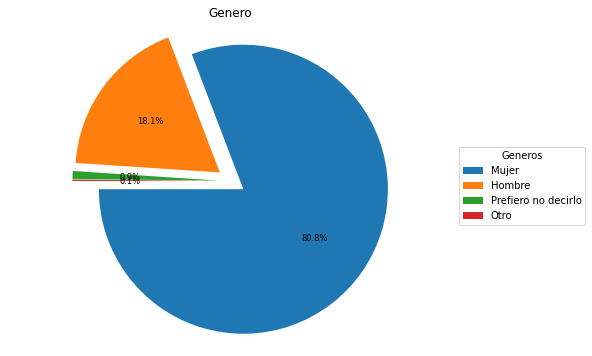

In [7]:
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))

patches, texts, autotexts = plt.pie(genero.values, labels=genero.index,
       startangle=180,
       explode = (0.1, 0.1, 0.1, 0.1,),
       autopct= '%.1f%%',
        rotatelabels = True,
       labeldistance = None,
       textprops={'size': 'small'},)

#Etiquetas (:
ax.legend(title="Generos",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

#Presentacion del Plot
plt.axis('equal')
plt.title('Genero', color='k')
plt.show()



In [25]:
niv_estudios = df.groupby(by='Nivel máximo de estudios')['Nivel máximo de estudios'].count().sort_values(ascending=False)
niv_estudios

Nivel máximo de estudios
Universidad     380
Preparatoria    211
Maestría         52
Secundaria       19
Doctorado         4
Primaria          1
Name: Nivel máximo de estudios, dtype: int64

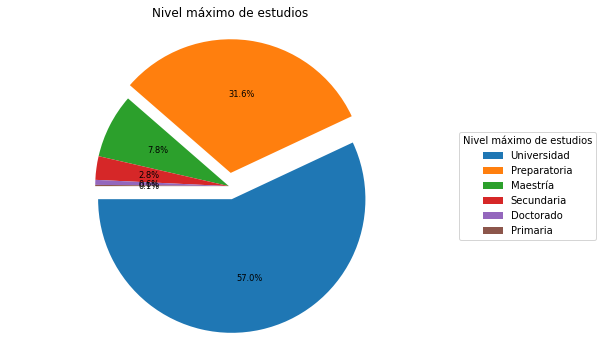

In [102]:
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))

patches, texts, autotexts = plt.pie(niv_estudios.values, labels=niv_estudios.index,
       startangle=180,
       explode = (0.1, 0.1, 0.0, 0.0,0.0, 0.0),
       autopct= '%.1f%%',
        rotatelabels = True,
       labeldistance = None,
       textprops={'size': 'small'},)

#Etiquetas (:
ax.legend(title="Nivel máximo de estudios",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

#Presentacion del Plot
plt.axis('equal')
plt.title('Nivel máximo de estudios', color='k')
plt.show()

In [7]:
Ubicaciones = df.groupby(by='Alcaldía')['Alcaldía'].count()
Ubicaciones

Alcaldía
Azcapotzalco               34
Benito Juárez              25
Coyoacán                   30
Cuajimalpa de Morelos       6
Cuauhtémoc                 22
Gustavo A. Madero         118
Iztacalco                  21
Iztapalapa                 47
La Magdalena Contreras      7
Miguel Hidalgo             44
Milpa Alta                  1
Otro                      183
Tlalpan                    17
Tláhuac                     8
Venustiano Carranza        71
Xochimilco                 12
Álvaro Obregón             21
Name: Alcaldía, dtype: int64

In [128]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


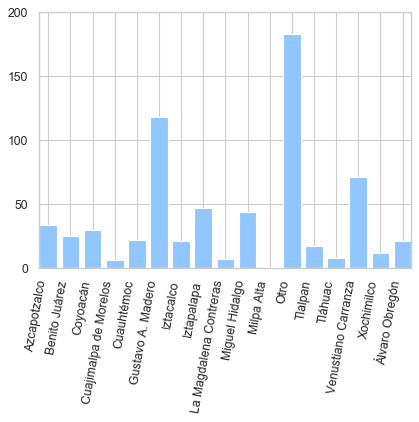

In [38]:
fig, ax = plt.subplots(figsize=(6, 4))
plt.bar(Ubicaciones.index, Ubicaciones.values)

#Orientacion de etiquetas del eje x
plt.xticks(rotation=80, ha='right')

plt.style.use("seaborn-pastel")

In [112]:
#df.groupby(by='Edad')['Edad'].count()
df["Edad"].describe()

count    667.000000
mean      31.182909
std       11.417131
min       12.000000
25%       21.000000
50%       30.000000
75%       40.000000
max       74.000000
Name: Edad, dtype: float64

<AxesSubplot:xlabel='Edad', ylabel='Density'>

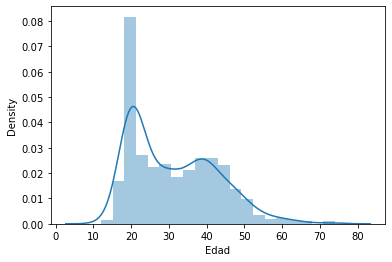

In [46]:
sns.distplot(df['Edad'], bins = 20)

### Preguntas Categoricas

In [261]:
df.columns[5:13]

Index(['¿Has escuchado alguna vez sobre la existencia de la violencia de género?',
       '¿Consideras un problema la violencia de género?',
       '¿Alguna ves has presenciado violencia de género?',
       '¿Donde has presenciado violencia de género?',
       '¿Cuáles crees que podrían ser formas de Violencia de género?',
       '¿Por qué motivo crees que se dé la violencia de género?',
       '¿Dentro de tu núcleo familiar has visto alguna vez violencia de género?',
       '¿Qué te provoca esta encuesta?'],
      dtype='object')

In [10]:
ask1 = pd.get_dummies(df['¿Has escuchado alguna vez sobre la existencia de la violencia de género?']).sum()
print(type(ask1))
print(ask1)

<class 'pandas.core.series.Series'>
No                         1
Prefiero no contestar      1
Sí                       663
Tal vez                    2
dtype: int64


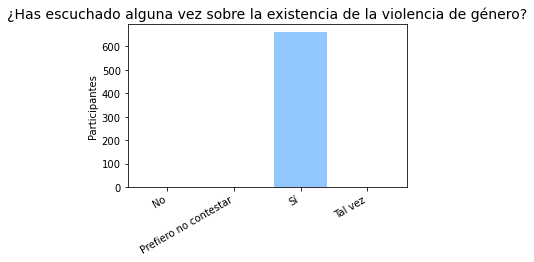

In [12]:
fig, axs = plt.subplots(figsize=(5, 3))
plt.bar(ask1.index, ask1.values,)

#Orientacion de etiquetas del eje x
plt.xticks(rotation=30, ha='right')
plt.title("¿Has escuchado alguna vez sobre la existencia de la violencia de género?", fontsize=14)
plt.ylabel("Participantes")
plt.style.use('seaborn-pastel')
plt.show()

#Creamos las etiquetas


In [13]:
ask2 = df.groupby(by='¿Consideras un problema la violencia de género?')['¿Consideras un problema la violencia de género?'].count()
ask2

¿Consideras un problema la violencia de género?
No          10
Sí         646
Tal vez     11
Name: ¿Consideras un problema la violencia de género?, dtype: int64

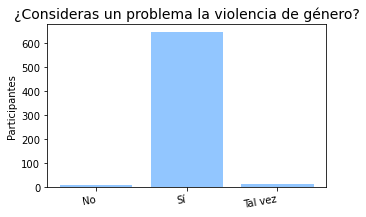

In [14]:
fig, axs = plt.subplots(figsize=(5, 3))
plt.bar(ask2.index, ask2.values,)

#Orientacion de etiquetas del eje x
plt.xticks(rotation=10, ha='right')
plt.title('¿Consideras un problema la violencia de género?', fontsize=14)
plt.ylabel("Participantes")
plt.style.use('seaborn-pastel')
plt.show()


In [145]:
ask3= df.groupby(by='¿Alguna ves has presenciado violencia de género?')['¿Alguna ves has presenciado violencia de género?'].count()

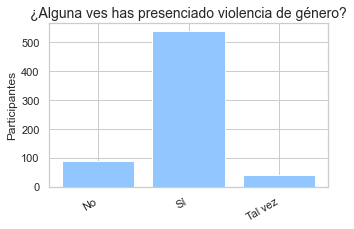

In [149]:
fig, axs = plt.subplots(figsize=(5, 3))
plt.bar(ask3.index, ask3.values,)

#Orientacion de etiquetas del eje x
plt.xticks(rotation=30, ha='right')
plt.title('¿Alguna ves has presenciado violencia de género?', fontsize=14)
plt.ylabel("Participantes")
plt.style.use('seaborn-pastel')
plt.show()


In [148]:
ask_4 = df['¿Donde has presenciado violencia de género?'].str.split(',', expand=True)
ask_4 = ask_4.groupby([0])[0].count().sort_values(ascending=False).head()
ask_4

0
En la familia           211
Todas las anteriores    157
En el trabajo            84
Ninguno                  77
En la escuela            57
Name: 0, dtype: int64

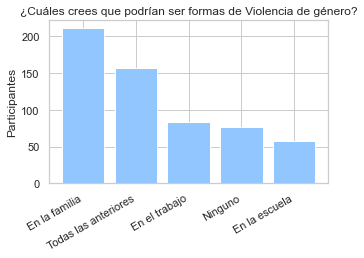

In [137]:
fig, axs = plt.subplots(figsize=(5, 3))
plt.bar(ask_4.index, ask_4.values,)

#Orientacion de etiquetas del eje x
plt.xticks(rotation=30, ha='right')
plt.title('¿Cuáles crees que podrían ser formas de Violencia de género?', fontsize=12)
plt.ylabel("Participantes")
plt.style.use('seaborn-pastel')
plt.show()

In [139]:
ask_5 = df['¿Cuáles crees que podrían ser formas de Violencia de género?'].str.split(',', expand=True)
ask_5 = ask_5.groupby([0])[0].count().sort_values(ascending=False).head()
ask_5

0
Todas las anteriores        492
Abuso verbal                145
Agredir psicológicamente     11
Golpear                      10
Ninguna                       3
Name: 0, dtype: int64

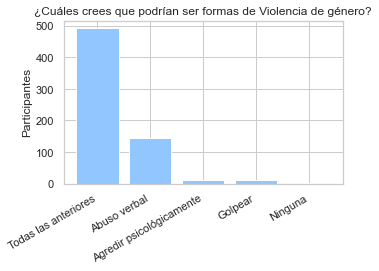

In [140]:
fig, axs = plt.subplots(figsize=(5, 3))
plt.bar(ask_5.index, ask_5.values,)

#Orientacion de etiquetas del eje x
plt.xticks(rotation=30, ha='right')
plt.title('¿Cuáles crees que podrían ser formas de Violencia de género?', fontsize=12)
plt.ylabel("Participantes")
plt.style.use('seaborn-pastel')
plt.show()

In [142]:
ask_6 = df['¿Por qué motivo crees que se dé la violencia de género?'].str.split(',', expand=True)
ask_6 = ask_6.groupby([0])[0].count().sort_values(ascending=False).head()
ask_6

0
Falta de educacion      344
Todas las anteriores    249
Costumbre familiar       35
Religión                 12
Falta de cultura          7
Name: 0, dtype: int64

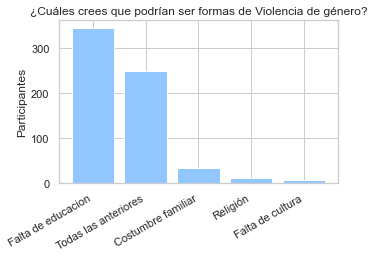

In [143]:
fig, axs = plt.subplots(figsize=(5, 3))
plt.bar(ask_6.index, ask_6.values,)

#Orientacion de etiquetas del eje x
plt.xticks(rotation=30, ha='right')
plt.title('¿Cuáles crees que podrían ser formas de Violencia de género?', fontsize=12)
plt.ylabel("Participantes")
plt.style.use('seaborn-pastel')
plt.show()

In [8]:
ask7 = pd.get_dummies(df['¿Dentro de tu núcleo familiar has visto alguna vez violencia de género?']).sum()
ask7

No         256
Sí         359
Tal vez     52
dtype: int64

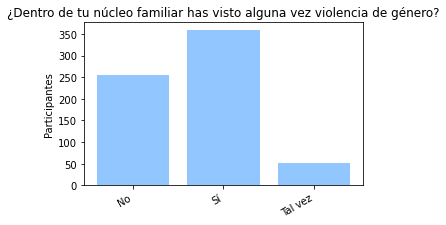

In [10]:
fig, axs = plt.subplots(figsize=(5, 3))
plt.bar(ask7.index, ask7.values,)

#Orientacion de etiquetas del eje x
plt.xticks(rotation=30, ha='right')
plt.title('¿Dentro de tu núcleo familiar has visto alguna vez violencia de género?', fontsize=12)
plt.ylabel("Participantes")
plt.style.use('seaborn-pastel')
plt.show()


In [67]:
ask8 = pd.get_dummies(df["¿Qué te provoca esta encuesta?"]).sum()
ask8 = ask8.sort_values(ascending=False)
ask8 = ask8.head()
tags = ask8.values

NameError: name 'ask8' is not defined

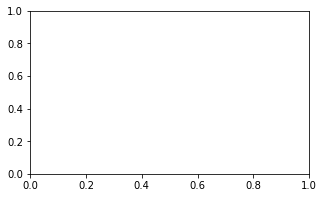

In [43]:
fig, axs = plt.subplots(figsize=(5, 3))
plt.bar(ask8.index, ask8.values,)

#Orientacion de etiquetas del eje x
plt.xticks(rotation=30, ha='right')
plt.title("¿Qué te provoca esta encuesta?", fontsize=12)
plt.ylabel("Participantes")

for i, rect in enumerate(ask8.values):
    posx = rect.get_x()
    posy = rect.get_height()
    ax.text(posx + 0.03, posy + 30, int(ask8.values[i]), color='black', fontsize = 8)

plt.style.use('seaborn-pastel')
plt.show()

In [ ]:
#Para comparar datos (:
sns.kdeplot(df['Edad'])